<b style="font-family: Arial; font-size:3em;color:indianred;">BITS F464 ML Project</b>

<b style="font-family: Arial; font-size:1.8em;color:steelblue;">Unsupervised Anomaly Detection and Supervised Classification<br> on different Datasets</b>

<div style="background-color: gainsboro; padding: 5px; border-radius: 5px;">
<b style="font-family: Arial; font-size:1.5em;color:lightslategray;">Group Members:</b>

* **<span style='color: darkslategray; font-size: 18px;'>Aarati Dhamele -2023B1A70641H</span>**
* **<span style='color: darkslategray; font-size: 18px;'>Arpit -2023B3A70482H</span>**
* **<span style='color: darkslategray; font-size: 18px;'>_Riddhi Chatterjee -2023A7PS0060H_</span>**
</div>

<b style="font-family: Arial; font-size:1.6em;color:steelblue;">Problem definition and Scope<br>

* <span style='color: black; font-size: 20px;'>In real-world applications like _fraud detection_ and medical diagnosis of _rare diseases_, data often suffers from high class imbalance. For _well-understood diseases_, on the other hand, data may not
have high class-imbalance. Employing a suitable model that could predict or classify a given transaction, or a health condition correctly more often than not is of utmost importance. Poor choice of model or sub-optimally trained model could lead to loss of business or cause harmful outcome for someone requiring medical attention.

* <span style='color: black; font-size: 20px;'>Recent technological advents in the domain of Machine Learning open up several possibilities  towards high-quality decision-support. The overwhelming amount of choices, at the same time, poses unprecedented challenges for professionals and academicians who are at the early stages in their learning journey.</span>

* <span style='color: black; font-size: 20px;'>Our current efforts are targeted towards addressing this problem, and attempts to pave a guided way of learning how to make choices with ML models, and focuses on several important learning aspects.</span>

* <span style='color: black; font-size: 20px;'>We aim to experiment with different ways of training multiple Unsupervised models, including tuning of their hyperparameters as needed, and also train one Classification model.</span>

* <span style='color: black; font-size: 20px;'>We make comparative evaluations of the results with effective visualizations.</span>

* <span style='color: black; font-size: 20px;'>We use different datasets of very different sizes and class-imbalances. <br> This contrast helps with better understanding of which model(s) with what kind of tuning could lead to better results, for each given dataset.</span>

<b style="font-family: Arial; font-size:1.6em;color:steelblue;">Learning objectives<br>

* <span style='color: black; font-size: 20px;'>Gaining Hands-on experience with training ML models of different kinds.
* <span style='color: black; font-size: 20px;'>Gaining insights into several nuances involved in the underlying theories.
* <span style='color: black; font-size: 20px;'>Getting a preview of various trade-offs Data Scientists and ML Engineers would make during optimizing a solution for production-ready environments.</span>
* <span style='color: black; font-size: 20px;'>With primary focus on the objectives stated above, we took liberty of using several established libraries made available by scikit-learn, TensorFlow, Matplotlib and so on. For boilerplate code syntax, several websites and tools were referred to.</span>

<b style="font-family: Arial; font-size:1.6em;color:steelblue;">Methodology<br>

### We train three unsupervised models with only normal (Class-0) data:
### We use the full set (samples of both Class-1 and Class-0) as Test data.  
### At the end of Training, we calculate "_anomaly scores_" for all samples in Test data.<br><br>These models and the respective scores are as follow:  
* **<span style='color: olivedrab; font-size: 18px;'>Isolation Forest**: </span><span style='font-size: 18px;'>The quicker a sample gets isolated, the higher is the probability that it was anomalous. 
<br>Hence the anomaly score is _based on the depth_ of the tree where the isolation occurred. (Though the score is not the exact depth itself).</span>

* **<span style='color: forestgreen; font-size: 18px;'>Autoencoder**: </span><span style='font-size: 18px;'>Learns to compress and reconstruct normal data. Anomalies should reconstruct poorly, giving high reconstruction error. <br>These reconstruction errors are treated as anomaly scores.</span>

* **<span style='color: cadetblue; font-size: 18px;'>XGBoost Regressor**: </span><span style='font-size: 18px;'>Also trained on normal data only, to predict all features. <br>During inference, mean prediction errors (squared) are used like reconstruction errors.</span>

### We then use a threshold to classify the samples under test into Anomalous or not.  
<span style='font-size: 18px;'>Assuming our sample dataset is representative enough, we may generally expect the proportion of anomalous records to be same as that we saw in our training dataset. We therefore keep this threshold close to the value corresponding to the (Class-1 ratio)th percentile value we had in our sample dataset.<br></span>

### We train the following supervised classification model with stratified split of Training and Test data:
* **<span style='color: steelblue; font-size: 18px;'>XGBoost Classifier**: </span><span style='font-size: 18px;'>This model directly classifies each sample of the test set into anomalous or not.
<br>It uses the label (Anomalous, i.e. Class-1) or not (Class-0) available for all samples in the training set.</span>

### Once we thus predict the labels of all samples, we proceed with comparing those with the actual labels we had.  
<span style='font-size: 18px;'>As we had the actual labels too available, we would calculate the _Confusion Matrix_ and the _Scores_ therefrom for both Classes:<br></span>
* <span style='color: firebrick; font-size: 18px;'>f1-score</span>
* <span style='color: darkmagenta; font-size: 18px;'>Precision</span>
* <span style='color: mediumvioletred; font-size: 18px;'>Recall</span>

### During training:
1. <span style='font-size: 20px;'>We _fine-tuned_ most hyperparameters trying to maximize the Class-1 f1-scores.</span>
2. <span style='font-size: 20px;'>We have used _Early Stopping_ for Autoencoder, XGBoost Regressor and Classifier, watching the validation-losses.</span>
3. <span style='font-size: 20px;'>We display the important results briefly from training of each model, especially detailing those from Autoencoder and XGBoost Regressor.</span>

### <b style="font-family: Arial; font-size:1em;color:navy;">We finally present the summary of the results of all models side by side.</b><br><br>

<b style="font-family: Arial; font-size:1.5em;color:slategray;">Import Libraries</b>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import regex as re
from itertools import product

from tqdm.notebook import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

import xgboost as xgb
from xgboost.callback import TrainingCallback
from xgboost import DMatrix, train

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import ipywidgets as widgets
from IPython.display import Markdown, HTML, display, clear_output

import random
import os

def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# Just some nice colours for printing the results of different models
model_colors = {"Isolation Forest": "olivedrab", "Autoencoder": "forestgreen", 
                "XGB Regressor": "cadetblue", "XGB Classifier": "steelblue"}

<div style="background-color: gainsboro; padding: 5px; border-radius: 10px;">
<b style="font-family: Arial; font-size:1.5em;color:slategray;">Implement basic utility functions</b></div>

### *get_safe_filename(filename)*

In [2]:
def get_safe_filename(filename):
    
    # Keep it well below 255 so that length does not go too high ...
    # even after appending 10 more characters from e.g. 'scores.csv'
    max_filename_length = 240 
    base_filename = filename[:max_filename_length]  # Truncate safely
    safe_filename = re.sub(r'[!@#$%^&*<>:"/\\|?*]', '', base_filename)  # Remove special characters

    return safe_filename

### *get_scores (y_true, y_pred)*

In [3]:
def get_scores(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict = True, zero_division=0)
    
    accuracy = round(report.pop("accuracy"),4)
    
    # keep only necessary metrics, and pop out the others
    report.pop("macro avg", None)
    report.pop("weighted avg", None)
    report.pop("accuracy", None)
    
    # Convert to a DataFrame for easier visualization
    scores = pd.DataFrame(report).T
    scores = scores.drop(columns=["support"])  # Remove 'support' column

    return accuracy, scores

### *get_scores_all_together(...)*

In [4]:
def get_scores_all_together(scores_iso, scores_ae, scores_xgbreg, scores_xgbclf, filename = None):

    # Create a dictionary mapping model names to their corresponding DataFrames
    models = {
        "Isolation Forest": scores_iso,
        "Autoencoder": scores_ae,
        "XGB Regressor": scores_xgbreg,
        "XGB Classifier": scores_xgbclf
    }
    
    # Convert DataFrames to a long-format DataFrame for easier plotting
    data = []
    
    for model_name, df in models.items():
        
        for class_label in ["0", "1"]:  # Class 0 and Class 1
    
            for metric in ["f1-score", "precision", "recall"]:
    
                data.append({
                    "Model": model_name,
                    "Class": class_label,
                    "Metric": metric,
                    "Score": df.loc[class_label, metric]
                })

    df_long = pd.DataFrame(data)

    ### Save the generated DF as a *.csv
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + ' ' + 'scores.csv'

    df_long.to_csv(safe_filename)

    return df_long

### *get_features_target(df, target)*

In [5]:
def get_features_target(df, target):
    
    class1_ratio = round(len(df[df[target]==1])/len(df),6)
    
    X = df.drop(columns=[target])
    y = df[target]

    return X, y, class1_ratio

### *get_Train_Test(X, y)*

In [6]:
def get_Train_Test(X, y, train_with_normal_only = False, test_size = 0.2):

    # Scale features 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    if(train_with_normal_only == True):
        # Select only the normal samples ("class 0" data) into Train set, ignore the test_size parameter in this case
 
        X_train = X_scaled[y == 0]

        # Full dataset for testing, again, only in this case, as there are no samples set aside for testing
        # in this case the testing would happen on all samples, normal and otherwise, that is, on the full data set available
        X_test = X_scaled

        #return X_train, X_test, y
        return X_train, X_test

    else:
        # Split into train & test
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, stratify = y, random_state = 40)

        return X_train, y_train, X_test, y_test

### *get_iso_grid (gridsize = ...)*

In [7]:
def get_iso_grid(gridsize = "Medium"):
    
    # Makes use of class1_ratio, which is expected to be available in global scope before a call to this method

    conta = [round(class1_ratio*1.01, 4)]
    
    n_estimator1, n_estimator2, n_estimator3 = 80, 100, 150
    max_sample1, max_sample2, max_sample3 = 0.25, 0.5, 1.0
    max_feature1, max_feature2, max_feature3 = 0.5, 0.75, 1.0
    
    if (gridsize == "Very Large"):
        n_estimators = [n_estimator1, n_estimator2, n_estimator3]
        max_samples = [max_sample1, max_sample2, max_sample3]
        max_features = [max_feature1, max_feature2, max_feature3]
        
    elif (gridsize == "Large"):
        n_estimators = [n_estimator1, n_estimator2, n_estimator3]
        max_samples = [max_sample2, max_sample3]
        max_features = [max_feature2, max_feature3]
        
    elif (gridsize == "Medium"):
        n_estimators = [n_estimator2, n_estimator3]
        max_samples = [max_sample2, max_sample3]
        max_features = [max_feature2, max_feature3]
        
    elif (gridsize == "Small"):
        n_estimators = [n_estimator2, n_estimator3]
        max_samples = [max_sample2, max_sample3]
        max_features = [max_feature3]

    elif (gridsize == "Single values"):
        n_estimators = [n_estimator3]
        max_samples = [max_sample2]
        max_features = [max_feature2]

        
    param_grid = {"n_estimators": n_estimators,
                      "max_samples": max_samples,
                      "max_features": max_features,
                      "contamination": conta
                    }
    
    return param_grid

### *get_ae_grid(gridsize = ...)*

In [8]:
def get_ae_grid(gridsize = "Medium"):

    # Makes use of X, class1_ratio, which are expected to be available in global scope before a call to this method
    # it also makes a couple of hard-coded assumptions, that --
    # (a) X_train had all 'normal / non-anomalous' samples only
    # (b) validation set was set aside by taking 20% of samples from X_train

    # Some error threshold values, anchored around Class1 ratio
    threshold_base = round((1 - class1_ratio*1.01)*100,4)
    
    if class1_ratio <= 0.01:
        threshold1 = round((1 - class1_ratio*1.5)*100,4)
        threshold2 = round((1 - class1_ratio/1.5)*100,4)
    else:
        threshold1 = round((1 - class1_ratio*1.1)*100,4)
        threshold2 = round((1 - class1_ratio/1.1)*100,4)
    
    # Some batch sizes, anchored around the Training size
    X_train_size = round(len(X)*(1 - class1_ratio)*0.8)

    batch_size_base = round(4*np.sqrt(X_train_size))
    batch_size1 = round(1.5*batch_size_base)
    batch_size2 = round(2*batch_size_base)
    batch_size3 = round(batch_size_base/2)
    
    if (gridsize == "Very Large"):
        anomaly_threshold_list = [threshold1, threshold_base, threshold2]
        batch_size_list = [batch_size1, batch_size2, batch_size_base, batch_size3]
    
    elif (gridsize == "Large"):
        anomaly_threshold_list = [threshold1, threshold_base]
        batch_size_list = [batch_size2, batch_size_base, batch_size3]
    
    elif (gridsize == "Medium"):
        anomaly_threshold_list = [threshold1, threshold_base]
        batch_size_list = [batch_size2, batch_size_base]

    elif (gridsize == "Small"):
        anomaly_threshold_list = [threshold_base]
        batch_size_list = [batch_size2, batch_size_base]

    elif (gridsize == "Single values"):
        anomaly_threshold_list = [threshold_base]
        batch_size_list = [batch_size_base]

    return anomaly_threshold_list, batch_size_list

    

### *get_xgbreg_grid(gridsize = ...)*

In [9]:
def get_xgbreg_grid(gridsize = "Medium"):

    # Let us build a grid of learn_rate and max_depth
    learn_rate1, learn_rate2, learn_rate3, learn_rate4 = 0.1, 0.15, 0.2, 0.25
    max_depth1, max_depth2, max_depth3, max_depth4 = 6, 8, 9, 10

    if (gridsize == "Very Large"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3, learn_rate4]
        max_depth = [max_depth1, max_depth2, max_depth3, max_depth4]
    
    elif (gridsize == "Large"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3]
        max_depth = [max_depth1, max_depth2, max_depth3, max_depth4]
    
    elif (gridsize == "Medium"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3]
        max_depth = [max_depth2, max_depth3, max_depth4]
        
    elif (gridsize == "Small"):
        learn_rate = [learn_rate1, learn_rate3]
        max_depth = [max_depth2, max_depth4]
        
    elif (gridsize == "Single values"):
        learn_rate = [learn_rate3]
        max_depth = [max_depth4]

    param_grid = {"learn_rate": learn_rate,
                  "max_depth": max_depth}

    return param_grid

### *get_xgbclf_grid(gridsize = ...)*

In [10]:
def get_xgbclf_grid(gridsize = "Medium"):

    # Let us build a grid of learn_rate and max_depth
    learn_rate1, learn_rate2, learn_rate3, learn_rate4 = 0.1, 0.15, 0.2, 0.25
    max_depth1, max_depth2, max_depth3, max_depth4 = 4, 6, 8, 10

    if (gridsize == "Very Large"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3, learn_rate4]
        max_depth = [max_depth1, max_depth2, max_depth3, max_depth4]
    
    elif (gridsize == "Large"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3]
        max_depth = [max_depth1, max_depth2, max_depth3, max_depth4]
    
    elif (gridsize == "Medium"):
        learn_rate = [learn_rate1, learn_rate2, learn_rate3]
        max_depth = [max_depth2, max_depth3, max_depth4]
        
    elif (gridsize == "Small"):
        learn_rate = [learn_rate1, learn_rate3]
        max_depth = [max_depth2, max_depth4]
        
    elif (gridsize == "Single values"):
        learn_rate = [learn_rate3]
        max_depth = [max_depth4]
        
    # Define the parameter grid with small variations for each hyperparameter
    param_grid = {"learn_rate": learn_rate,
                  "max_depth": max_depth}

    return param_grid

### *load_dataset()*

In [11]:
def load_dataset(b):

    # following variables are made available in global scope and used in many methods
    global filename, target, plot_title, X, y, class1_ratio
    
    if selected_option == 'Credit Card transactions':
    
        filename = "creditcard"    # Credit Card Transactions Dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
        target = "Outcome"
        plot_title = 'Credit Card Transactions'
    
    elif selected_option == 'Diabetes':
    
        filename = "diabetes"
        target = "Outcome"
        plot_title = 'Diabetes'
    
    df = pd.read_csv(filename + '.csv')
    df = df.iloc[: , 1:]   # No need of reading the first column ('Time')
    
    X, y, class1_ratio = get_features_target(df, target) 
    n_samples, n_features = X.shape
    
    with output:
        clear_output(wait=True)
 
        display(Markdown(f"#### <span style='color: dimgray; font-size: 20px;'>**Dataset: </span>\
        <span style='color: indianred; font-size: 20px;'>{selected_option}**</span>\
        <span style='color: royalblue; font-size: 20px;'>{n_samples} samples, {n_features} features, 1 outcome label</span>\
        <span style='color: black; font-size: 20px;'> | </span>\
        <span style='color: indianred; font-size: 20px;'>**Class-1 ratio:</span> \
        <span style='color: royalblue; font-size: 20px;'>{round(class1_ratio*100,4)}%**</span>"))
   

<div style="background-color: gainsboro; padding: 5px; border-radius: 10px;">
<b style="font-family: Arial; font-size:1.5em;color:slategray;">Implement Plotting functions</b></div>

In [12]:
def plot_left_labels_despine(fig, axes, plot_title = None):
    
    fig_title = 'Anomaly detection and Classification:' 

    if (plot_title): fig_title = fig_title + '\n' + str(plot_title)
    
    fig.suptitle(fig_title, fontsize = 12, fontweight = "bold", color = 'slategrey')
    
    fontsize = 14
    # Left Column with names of things printed (CM, Class-1 F1 score and Accuracy)
    for row in range (0,3):
    
        if (row == 0): 
            axis_text = "Confusion Matrix" 
            color = 'chocolate'
            va = 'center'
        if (row == 1): 
            axis_text = "Class-1\nF1-score" 
            color = 'royalblue'
            va = 'bottom'
        if (row == 2): 
            axis_text = "Accuracy" 
            color = 'slategrey'
            va = 'bottom'
    
        axes[row, 0].text(0.5, 0.5, axis_text, rotation = 90, color = color,
                    fontsize=fontsize, ha='center', va = va, fontweight='bold')

    # Cosmetics
    pos = axes[1, 0].get_position()
    axes[1, 0].set_position([pos.x0, pos.y0 - 0.07, pos.width, pos.height])  # Push second row slightly down

    pos = axes[2, 0].get_position()
    axes[2, 0].set_position([pos.x0, pos.y0 - 0.03, pos.width, pos.height])  # Push third row slightly down

    # Disable tick marks for all subplots
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        sns.despine(ax = ax, top=True, right=True, left=True, bottom=True)


In [13]:
def plot_pies(axis, value, color, fontsize = 18):

    start_angle = 180
    colors = ["white", "white", color]
    edge_colors = ['white', color, color]
    wedges, _ = axis.pie([0.5, 0.5*(1 - value), 0.5*value], startangle = start_angle,
                          colors=colors, radius=1.2, wedgeprops=dict(width=0.25))
    
    for wedge, edge_color in zip(wedges, edge_colors):
        wedge.set_edgecolor(edge_color)

    axis.text(0, -0.25, f"{value*100:.2f}%", 
                           ha='center', va='center', color = color, fontsize = fontsize, fontweight='bold')

    

In [14]:
def plot_cm_clas1f1_accuracy(anomalies_iso, anomalies_ae, anomalies_xgb, classified_xgbclf, y_test, model_colors, filename, plot_title = None):

    y_full = pd.DataFrame(y)
    
    # Get the scores from all four alogorithms
    accuracy_iso, scores_iso = get_scores(y_full, anomalies_iso)
    accuracy_ae, scores_ae = get_scores(y_full, anomalies_ae)
    accuracy_xgbreg, scores_xgbreg = get_scores(y_full, anomalies_xgbreg)
    accuracy_xgbclf, scores_xgbclf = get_scores(y_test, classified_xgbclf)

    class1_f1_iso = round(scores_iso.loc["1","f1-score"],4)
    class1_f1_ae = round(scores_ae.loc["1","f1-score"],4)
    class1_f1_xgbreg = round(scores_xgbreg.loc["1","f1-score"],4)
    class1_f1_xgbclf = round(scores_xgbclf.loc["1","f1-score"],4)
    
    # Set up Seaborn subplots for the first figure (3 rows, 5 columns)
    fig_cm_accuracy_class1f1, axes_cm_accu_class1f1 = plt.subplots(3, 5, figsize=(12, 7), 
                             gridspec_kw={'width_ratios': [0.25,3,3,3,3], 'wspace':0.25,
                                          'height_ratios': [1,1,0.7], 'hspace':0.15})
    
    plot_left_labels_despine(fig_cm_accuracy_class1f1, axes_cm_accu_class1f1, plot_title)

    ###################### CONFUSION MATRIX, Class - 1 F1-score and Accuracy ####################
    
    cm_labels = ["[0]", "[1]"]
    
    cm_iso = confusion_matrix(y_full, anomalies_iso)
    cm_ae = confusion_matrix(y_full, anomalies_ae)
    cm_xgbreg = confusion_matrix(y_full, anomalies_xgbreg)
    cm_xgbclf = confusion_matrix(y_test, classified_xgbclf)

    cmap = sns.cubehelix_palette(start=1.25, rot=0.05, as_cmap=True)

    confusion_matrices = [cm_iso, cm_ae, cm_xgbreg, cm_xgbclf]
    f1_scores = [class1_f1_iso, class1_f1_ae, class1_f1_xgbreg, class1_f1_xgbclf]
    accuracies = [accuracy_iso, accuracy_ae, accuracy_xgbreg, accuracy_xgbclf]
    colors = list(model_colors.values())
    model_names = list(model_colors.keys())
    fontsize=14
    fontweight='bold'
    
    for column in range (1,5):

        model_name = model_names [column-1]
        cm = confusion_matrices[column-1]
        f1_score = f1_scores [column-1]
        accuracy = accuracies [column-1]
        color = colors[column-1]

        disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cm_labels)
        disp_cm.plot(cmap = cmap, ax = axes_cm_accu_class1f1[0,column], colorbar = False)
        
        axes_cm_accu_class1f1[0,column].set_title(model_name, color = color, fontsize = fontsize, fontweight = fontweight)
        axes_cm_accu_class1f1[0,column].set_xticks([0,1],["[0]", "[1]"])
        axes_cm_accu_class1f1[0,column].set_yticks([0,1],["[0]", "[1]"])
        axes_cm_accu_class1f1[0,column].set_ylabel("True", fontsize = 10, labelpad = -10)
        axes_cm_accu_class1f1[0,column].set_xlabel("Pred.", fontsize = 10, labelpad = -10) 
        axes_cm_accu_class1f1[0,column].set_aspect(1)
        
        pos = axes_cm_accu_class1f1[1, column].get_position()
        axes_cm_accu_class1f1[1, column].set_position([pos.x0, pos.y0 - 0.05, pos.width, pos.height])  # Push the row 2 slightly down
        
        plot_pies(axes_cm_accu_class1f1[1,column], f1_score, color)

        plot_pies(axes_cm_accu_class1f1[2,column], accuracy, color, fontsize = 14)

    plt.show()
    
    display(Markdown("#### **Accuracy is often misleading, esp. for datasets with high class-imbalance**"))
    display(Markdown("##### Class-0 f1-scores were also expected to be very high"))
    display(Markdown("##### Our objective was to optimze Class-1 f1-scores without overfitting"))
        
    ###################### Class - 1 F1-score and Accuracy #####################

    ################## Save the generated 'results' figure as an image ###############
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + ' ' + 'Confusion Matrix.png'
    
    fig_cm_accuracy_class1f1.savefig(safe_filename, dpi=300, bbox_inches="tight")
    
    ####################### START of the second figure, "scores" #############################

    df_all_scores = get_scores_all_together(scores_iso, scores_ae, scores_xgbreg, scores_xgbclf, filename)
            
    plot_f1_precision_recall(df_all_scores, model_colors, filename)

    ####################### END of the second figure, "scores" #############################
    

In [15]:
def plot_f1_precision_recall(df, model_colors, filename, plot_title = None):

    fig_title = 'F1-score, Precision, Recall across Models for both classes: ' 

    if (plot_title): 
        fig_title = fig_title + str(plot_title)
    
    # Set up the figure and subplots
    fig, axes = plt.subplots(2, 3, figsize=(10, 7), sharey=True, 
                             gridspec_kw={'width_ratios': [1,1,1], 'wspace':0.8,
                                          'height_ratios': [1,1], 'hspace':0.5})

    fig.suptitle(fig_title, fontsize = 12, fontweight = "bold", color = 'slategrey')
    
    # Define row and column mapping for the six subplots
    metrics = ["f1-score", "precision", "recall"]
    
    for row, class_label in enumerate(["1", "0"]):  # Row 0 -> Class 1, Row 1 -> Class 0
        
        for col, metric in enumerate(metrics):  # Columns for f1-score, precision, recall
            
            ax = axes[row, col]
            
            # Filter data for the current class and metric
            df_plot = df[(df["Class"] == class_label) & (df["Metric"] == metric)]

            bar_colors = [model_colors[model] for model in df_plot["Model"]]
            
            # Create a seaborn barplot
            bars = sns.barplot(data = df_plot, x = "Score", y = "Model", ax = ax, 
                               palette = bar_colors, saturation=0.75, width=0.8, fill = True)

            # Ensure all bars are scaled consistently across subplots
            ax.set_xlim(0, 1)

            if col == 0:

                # set the yticklabel (model name) color same as the respective bar color
                for label, yticklabel_color in zip(ax.get_yticklabels(), bar_colors):
                    label.set_color(yticklabel_color)

                ax.tick_params(axis='y', which='major', labelsize = 16)

            # Add score labels at the right-most edge of each bar
            for container in bars.containers:
                for bar, color in zip(container, bar_colors):
                    bars.text(
                        bar.get_x() + bar.get_width() + 0.01,  # Position slightly outside the bar
                        bar.get_y() + bar.get_height() / 2,   # Center vertically
                        f"{bar.get_width() * 100:.2f}%",      # Format as percentage
                        va = "center", ha = "left", fontsize = 16, color = color
                    )
           
    
            # Titles (Metric names) for first row only
            if row == 0:

                if col == 0: title_color = 'firebrick'
                elif col == 1: title_color = 'darkmagenta'
                else: title_color = 'mediumvioletred'
                ax.set_title(f"{metric.capitalize()}", fontsize = 14, color = title_color, weight = "bold")
            
            else:
                ax.set_title("")
            
            ax.set_xticks([])
            ax.set_xlabel("")
            
            if col == 0:

                if row == 0: # Class-1 label
                    ylabel_color = 'black'  
                else:        # Class-0 label
                    ylabel_color = 'grey'
                    
                ax.set_ylabel(f"Class {class_label}", fontsize=16, color = ylabel_color, weight="bold")
                
                ax.set_yticks([])
                ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
                
            else:
                ax.set_ylabel("")
               
            ax.tick_params(left=False) 
            sns.despine(ax = ax, top=True, right=True, left=True, bottom=True)
    
    plt.subplots_adjust(top=0.85)
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

    ### Save the generated figure as an image
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + ' ' + 'scores.png'
    
    fig.savefig(f"{safe_filename}", dpi=300, bbox_inches="tight")
    

In [16]:
def plot_autoencoder_results(df_f1_scores, 
                             df_metrics_ae, best_f1_ae, best_params_ae, final_best_epoch,
                             df_errors_labels_ae, 
                             anomalies_ae, 
                             filename):

    # Create a figure with a customized grid layout
    fig = plt.figure(figsize=(14, 10))
    
    # Define grid layout: 2 rows, 16 columns (to accommodate different, finer width ratios)
    gs = fig.add_gridspec(2, 16, height_ratios=[2, 3], hspace=0.3, wspace=1)
    
    # First row: width_ratio = [6,10]
    ax1 = fig.add_subplot(gs[0, :6])  # Top-left, takes first 6 columns
    ax2 = fig.add_subplot(gs[0, 7:])  # Top-right, leaves one column gap, takes next 9 columns
    
    # Second row: width_ratio = [12,4]
    ax3 = fig.add_subplot(gs[1, :12])  # Bottom-left, takes first 12 columns
    ax4 = fig.add_subplot(gs[1, 13:])  # Bottom-right, leaves one column gap, takes next 3 columns

    plot_title_colour = 'slategrey'
    
    #################### PLOT F1-scores per anomaly threshold and batch size, on ax1 ####################
    
    # Pivot the DataFrame for heatmap of F1-Scores (reshaping for seaborn)
    heatmap_data = df_f1_scores.pivot(index="error_threshold", columns="batch_size", values="f1_score(%)")
    
    # Find max F1-score to highlight
    max_f1 = df_f1_scores["f1_score(%)"].max()
    
    cmap = sns.cubehelix_palette(start=2.8, rot=-0.5, as_cmap=True)
    
    # Create heatmap of f1-scores on ax1 (Top left subplot)
    sns.heatmap(heatmap_data, ax = ax1, 
                annot=False, fmt=".2f", cmap = cmap, annot_kws={"size": 20, "color": "red"}, linewidths=0.5, cbar=False)
    
    # annot = True did not work, ... :-(, manually add F1-score annotations in each grid cell
    for i in range(heatmap_data.shape[0]):  # Rows (error_thresholds)
        for j in range(heatmap_data.shape[1]):  # Columns (batch_sizes)
            f1_value = heatmap_data.iloc[i, j]
            if pd.notna(f1_value):  # Check if value is not NaN
                color = "black" if f1_value < max_f1*0.4 else "white"  # Ensure readability
                fontsize = 12 if f1_value != max_f1 else 14
                fontweight = "light" if f1_value != max_f1 else "bold"
                rotation = 0 if f1_value != max_f1 else 45
                ax1.text(j + 0.5, i + 0.5, f"{f1_value:.2f}", 
                        ha="center", va="center", fontsize = fontsize, color = color, fontweight = fontweight, rotation = rotation)
    
    ax1.set_title("Class-1 (Anomalies) F1-scores (%)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax1.set_xlabel("Batch Size", fontsize = 14)
    ax1.set_ylabel("Anomaly scores \nCutoff Percentile", fontsize = 14)
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 12)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize = 12)

    sns.despine(ax = ax1, left = True, bottom = True)

    ########### PLOT Training and Validation losses for the Best run on ax2 (top right sub plot) ##############
    ########### annotating with the used Anomaly threshold, Batch size and the resulting best F1-score ########
    df_cleaned = df_metrics_ae.copy()
        
    # Convert Inf values to NaN
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
    
    # Drop any remaining NaN values
    df_cleaned = df_cleaned.dropna()
    
    # Reset index after cleaning (optional but good practice)
    df_cleaned.reset_index(drop=True, inplace=True)
    
    # Melt the DataFrame for seaborn
    df_melted = df_cleaned.melt(id_vars=["epoch"], 
                            value_vars=["Training loss", "Validation loss"], 
                            var_name="Metric", 
                            value_name="Value")
    
    # Determine the number of epochs
    epochs_list = df_cleaned["epoch"].unique()
    num_epochs = len(epochs_list)
    
    # Dynamically determine how many x-ticks to show
    max_ticks = 30  # adjust this based on figure or subplot size
    tick_interval = 1
    if num_epochs > max_ticks:
        tick_interval = max(epochs_list[-1] // max_ticks, 1)  # Ensure at least interval = 1
        xticks = [e for e in epochs_list if e % tick_interval == 0]
    else:
        xticks = epochs_list
    
    sns.scatterplot(data = df_melted, ax = ax2, x = "epoch", y = "Value", 
                             hue = "Metric", style = "Metric", s = round(50/tick_interval), alpha = 0.8)
    
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks, rotation=90 if num_epochs > max_ticks else 0)
    
    ax2.yaxis.grid(True)  
    ax2.xaxis.grid(False)  
    
    ax2.axvline(x = final_best_epoch, color = "green", linestyle = "--", linewidth = 1.5, label = f"Best Epoch: {final_best_epoch}")
    
    error_threshold, batch_size = best_params_ae
        
    annotation_text = f"Class-1 f1 score: {best_f1_ae}% at\nAnomaly score cutoff percentile: {error_threshold}%\nBatch Size used: {batch_size}"
    
    #anno_txt_position_x = final_best_epoch * 0.25
    #anno_txt_position_y = max(df_cleaned["Training loss"]) * 0.55

    
    #ax2.text(anno_txt_position_x, anno_txt_position_y, annotation_text, 
    #             fontsize = 12, color = "black", bbox = dict(facecolor = "white", alpha = 0.8, edgecolor = "none"))
        
    ax2.set_title("Autoencoder Training and Validation (best run)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax2.set_xlabel("Epoch", fontsize = 12)
    ax2.set_ylabel("Loss", fontsize = 12)
    
    ax2.legend(fontsize = 12, scatterpoints = 3, markerscale = 1.2, framealpha=0.8, edgecolor="none",
                 loc="center", bbox_to_anchor=(0.4, 0.9))

    sns.despine(ax = ax2, left = False, bottom = False)

    ################### PLOT the TP, FP, FN data points with their reconstruction error values, on ax3 #######################
    
    # Define custom colors for the categories
    palette = {"True Positives": "green", "False Positives": "red", "False Negatives": "orange"}
    
    legend_order = ["True Positives", "False Positives", "False Negatives"]    
    
    # Plot using seaborn
    df_errors_TP_FP_FN = df_errors_labels_ae[df_errors_labels_ae["Category"] != "True Negatives"]

    sns.scatterplot(data = df_errors_TP_FP_FN, ax = ax3, x = df_errors_TP_FP_FN.index,  y = "Error", 
                    hue = "Category", hue_order = legend_order, palette = palette, alpha = 0.5)

    ax3.set_xlabel("Index of Samples", fontsize = 14)
    ax3.set_ylabel("Reconstruction Errors", fontsize = 14)
    ax3.set_title("Reconstruction Errors for TP, FP, FN (TN not shown)", fontsize = 14, fontweight = 'bold', color = plot_title_colour)
    
    # show the cutoff value and a horizontal line at that
    error_cutoff_value = np.percentile(df_errors_labels_ae["Error"], error_threshold)
    ax3.axhline(y=error_cutoff_value, color='navy', linestyle='dashed', linewidth=1.2, label=f"{error_threshold} th Percentile")
    
    ax3.text(ax3.get_xlim()[0], error_cutoff_value, f"{round(error_cutoff_value,2)}", 
         fontsize=12, color="navy", ha="right", va="center",
         bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

    ax3.legend(fontsize = 10, markerscale = 1, framealpha=0.5, edgecolor="gray",
                 loc="center", bbox_to_anchor=(0.9, 0.75))

    sns.despine(ax = ax3, left = False, bottom = False)
    
    #################### PLOT the Confusion Matrix corresponding to the best F1 score, on ax4 (Bottom right sub plot) ####################
    y_full = pd.DataFrame(y)
    
    cm_ae = confusion_matrix(y_full, anomalies_ae)

    cm_labels = ["[0]", "[1]"]

    cmap = sns.cubehelix_palette(start=1.25, rot=0.05, as_cmap=True)

    disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm_ae, display_labels = cm_labels)
    disp_cm.plot(cmap = cmap, ax = ax4, colorbar = False, text_kw={'fontsize': 14})
    
    ax4.set_title("Class 1 Predicted & True", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax4.set_ylabel("True", fontsize = 14)
    ax4.set_xlabel("Predicted", fontsize = 14) 
    
    ax4.set_xticks([0,1],["[0]", "[1]"])
    ax4.set_yticks([0,1],["[0]", "[1]"])

    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, fontsize = 14)
    ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0, fontsize = 14)

    sns.despine(ax = ax4, left = True, bottom = True)
    
    plt.show()

    ### Save the generated figure as an image
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + '.png'
    
    fig.savefig(f"{safe_filename}", dpi=300, bbox_inches="tight")

In [17]:
def plot_xgbreg_results(df_f1_scores_xgbreg, 
                        df_metrics_xgbreg, best_f1_xgbreg, best_params_xgbreg, final_best_round_xgbreg,
                        df_errors_labels_xgbreg, 
                        anomalies_xgbreg, 
                        filename):

    # Create a figure with a customized grid layout
    fig = plt.figure(figsize=(14, 10))
    
    # Define grid layout: 2 rows, 16 columns (to accommodate different, finer width ratios)
    gs = fig.add_gridspec(2, 16, height_ratios=[2, 3], hspace=0.3, wspace=1)
    
    # First row: width_ratio = [6,10]
    ax1 = fig.add_subplot(gs[0, :6])  # Top-left, takes first 6 columns
    ax2 = fig.add_subplot(gs[0, 7:])  # Top-right, leaves one column gap, takes next 9 columns
    
    # Second row: width_ratio = [12,4]
    ax3 = fig.add_subplot(gs[1, :12])  # Bottom-left, takes first 12 columns
    ax4 = fig.add_subplot(gs[1, 13:])  # Bottom-right, leaves one column gap, takes next 3 columns

    plot_title_colour = 'slategrey'

    ############## Plot the f1 scores from all rounds against the hyperparameter values ##############

    # Pivot the DataFrame for heatmap of F1-Scores (reshaping for seaborn)
    heatmap_data = df_f1_scores_xgbreg.pivot(index="Max depth", columns="Learning rate", values="f1_score(%)")

    # Find max F1-score to highlight
    max_f1 = df_f1_scores_xgbreg["f1_score(%)"].max()
    
    cmap = sns.cubehelix_palette(start=2.8, rot=-0.5, as_cmap=True)
    
    # Create heatmap of f1-scores on ax1 (Top left subplot)
    sns.heatmap(heatmap_data, ax = ax1, 
                annot=False, fmt=".2f", cmap = cmap, annot_kws={"size": 20, "color": "red"}, linewidths=0.5, cbar=False)

    # annot = True did not work, ... :-(, manually add F1-score annotations in each grid cell
    for i in range(heatmap_data.shape[0]):  # Rows (error_thresholds)
        for j in range(heatmap_data.shape[1]):  # Columns (batch_sizes)
            f1_value = heatmap_data.iloc[i, j]
            if pd.notna(f1_value):  # Check if value is not NaN
                color = "black" if f1_value < max_f1*0.4 else "white"  # Ensure readability
                fontsize = 12 if f1_value != max_f1 else 14
                fontweight = "light" if f1_value != max_f1 else "bold"
                rotation = 0 if f1_value != max_f1 else 45
                ax1.text(j + 0.5, i + 0.5, f"{f1_value:.2f}", 
                        ha="center", va="center", fontsize = fontsize, color = color, fontweight = fontweight, rotation = rotation)
    
    ax1.set_title("Class-1 (Anomalies) F1-scores (%)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax1.set_xlabel("Learning rate", fontsize = 14)
    ax1.set_ylabel("Max. Depth", fontsize = 14)
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 12)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize = 12)

    sns.despine(ax = ax1, left = True, bottom = True)

    ########### PLOT Training and Validation losses for the Best run on ax2 (top right sub plot) ##############

    df_cleaned = df_metrics_xgbreg.copy()
        
    # Convert Inf values to NaN
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
    
    # Drop any remaining NaN values
    df_cleaned = df_cleaned.dropna()
    
    # Reset index after cleaning (optional but good practice)
    df_cleaned.reset_index(drop=True, inplace=True)
    
    # Melt the DataFrame for seaborn
    df_melted = df_cleaned.melt(id_vars=["round"], 
                            value_vars=["Training loss", "Validation loss"], 
                            var_name="Metric", 
                            value_name="Value")

    # Determine the number of rounds
    rounds_list = df_cleaned["round"].unique()
    num_rounds = len(rounds_list)

    # Dynamically determine how many x-ticks to show
    max_ticks = 30  # adjust this based on figure or subplot size
    tick_interval = 1
    if num_rounds > max_ticks:
        tick_interval = max(rounds_list[-1] // max_ticks, 1)  # Ensure at least interval = 1
        xticks = [r for r in rounds_list if r % tick_interval == 0]
    else:
        xticks = rounds_list

    sns.scatterplot(data = df_melted, ax = ax2, x = "round", y = "Value", 
                             hue = "Metric", style = "Metric", s = round(50/tick_interval), alpha = 0.8)
 
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks, rotation=90 if num_rounds > max_ticks else 0)
    
    ax2.yaxis.grid(True)  
    ax2.xaxis.grid(False)  
    
    ax2.axvline(x = final_best_round_xgbreg, 
                color = "green", linestyle = "--", linewidth = 1.5, label = f"Best Round: {final_best_round_xgbreg}")

    ax2.set_title("XGBoost Training and Validation (best run)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax2.set_xlabel("Round", fontsize = 12)
    ax2.set_ylabel("Loss", fontsize = 12)
    
    ax2.legend(fontsize = 12, scatterpoints = 3, markerscale = 1.2, framealpha=0.8, edgecolor="none",
                 loc="center", bbox_to_anchor=(0.4, 0.9))

    sns.despine(ax = ax2, left = False, bottom = False)

    ################### PLOT the TP, FP, FN data points with their reconstruction error values, on ax3 #######################
    
    # Define custom colors for the categories
    palette = {"True Positives": "green", "False Positives": "red", "False Negatives": "orange"}
    
    legend_order = ["True Positives", "False Positives", "False Negatives"]    
    
    # Plot using seaborn
    df_errors_TP_FP_FN = df_errors_labels_xgbreg[df_errors_labels_xgbreg["Category"] != "True Negatives"]

    #sns.scatterplot(data = df_errors_TP_FP_FN, ax = ax3, x = df_errors_TP_FP_FN.index,  y = "Error", 
    #                hue = "Category", hue_order = legend_order, palette = palette, alpha = 0.5)

    # Removing just ONE outlier to plot better
    df_errors_TP_FP_FN_max_removed = df_errors_TP_FP_FN.drop(df_errors_TP_FP_FN["Error"].idxmax())
    sns.scatterplot(data = df_errors_TP_FP_FN_max_removed, ax = ax3, x = df_errors_TP_FP_FN_max_removed.index,  y = "Error", 
                    hue = "Category", hue_order = legend_order, palette = palette, alpha = 0.5)

    ax3.set_xlabel("Index of Samples", fontsize = 14)
    ax3.set_ylabel("Errors", fontsize = 14)
    ax3.set_title("Errors for TP, FP, FN (TN not shown)", fontsize = 14, fontweight = 'bold', color = plot_title_colour)

    error_threshold = best_params_xgbreg["anomaly_threshold"]
    
    # show the cutoff value and a horizontal line at that
    error_cutoff_value = np.percentile(df_errors_labels_xgbreg["Error"], error_threshold)
    ax3.axhline(y=error_cutoff_value, color='navy', linestyle='dashed', linewidth=1.2, label=f"{error_threshold} th Percentile")
    
    ax3.text(ax3.get_xlim()[0], error_cutoff_value, f"{round(error_cutoff_value,2)}", 
             fontsize=12, color="navy", ha="right", va="center",
             bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

    ax3.legend(fontsize = 10, markerscale = 1, framealpha=0.5, edgecolor="gray",
                 loc="center", bbox_to_anchor=(0.9, 0.9))

    sns.despine(ax = ax3, left = False, bottom = False)

    #################### PLOT the Confusion Matrix corresponding to the best F1 score, on ax4 (Bottom right sub plot) ####################
    y_full = pd.DataFrame(y)
    
    cm_xgbreg = confusion_matrix(y_full, anomalies_xgbreg)

    cm_labels = ["[0]", "[1]"]

    cmap = sns.cubehelix_palette(start=1.25, rot=0.05, as_cmap=True)

    disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm_xgbreg, display_labels = cm_labels)
    disp_cm.plot(cmap = cmap, ax = ax4, colorbar = False, text_kw={'fontsize': 14})
    
    ax4.set_title("Class 1 Predicted & True", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax4.set_ylabel("True", fontsize = 14)
    ax4.set_xlabel("Predicted", fontsize = 14) 
    
    ax4.set_xticks([0,1],["[0]", "[1]"])
    ax4.set_yticks([0,1],["[0]", "[1]"])

    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, fontsize = 14)
    ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0, fontsize = 14)

    sns.despine(ax = ax4, left = True, bottom = True)
    
    plt.show()

    ### Save the generated figure as an image
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + '.png'
    
    fig.savefig(f"{safe_filename}", dpi=300, bbox_inches="tight")

In [18]:
def plot_xgbclf_results(df_f1_scores_xgbclf, 
                        df_metrics_xgbclf, final_best_round_xgbclf,
                        filename):
    
    # Set up the figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2,5], 'wspace':0.2})

    ax1 = axes[0]
    ax2 = axes[1]

    plot_title_colour = 'slategrey'

    ############## Plot the f1 scores from all rounds against the hyperparameter values ##############

    # Pivot the DataFrame for heatmap of F1-Scores (reshaping for seaborn)
    heatmap_data = df_f1_scores_xgbclf.pivot(index="Max depth", columns="Learning rate", values="f1_score(%)")

    # Find max F1-score to highlight
    max_f1 = df_f1_scores_xgbclf["f1_score(%)"].max()
    
    cmap = sns.cubehelix_palette(start=2.8, rot=-0.5, as_cmap=True)
    
    # Create heatmap of f1-scores on ax1 (Top left subplot)
    sns.heatmap(heatmap_data, ax = ax1, 
                annot=False, fmt=".2f", cmap = cmap, annot_kws={"size": 20, "color": "red"}, linewidths=0.5, cbar=False)

    # annot = True did not work, ... :-(, manually add F1-score annotations in each grid cell
    for i in range(heatmap_data.shape[0]):  # Rows (error_thresholds)
        for j in range(heatmap_data.shape[1]):  # Columns (batch_sizes)
            f1_value = heatmap_data.iloc[i, j]
            if pd.notna(f1_value):  # Check if value is not NaN
                color = "black" if f1_value < max_f1*0.4 else "white"  # Ensure readability
                fontsize = 12 if f1_value != max_f1 else 14
                fontweight = "light" if f1_value != max_f1 else "bold"
                rotation = 0 if f1_value != max_f1 else 45
                ax1.text(j + 0.5, i + 0.5, f"{f1_value:.2f}", 
                        ha="center", va="center", fontsize = fontsize, color = color, fontweight = fontweight, rotation = rotation)
    
    ax1.set_title("Class-1 (Anomalies) F1-scores (%)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax1.set_xlabel("Learning rate", fontsize = 14)
    ax1.set_ylabel("Max. Depth", fontsize = 14)
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 12)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize = 12)

    sns.despine(ax = ax1, left = True, bottom = True)

    ########### PLOT Training and Validation losses for the Best run on ax2 (top right sub plot) ##############

    df_cleaned = df_metrics_xgbclf.copy()
        
    # Convert Inf values to NaN
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
    
    # Drop any remaining NaN values
    df_cleaned = df_cleaned.dropna()
    
    # Reset index after cleaning (optional but good practice)
    df_cleaned.reset_index(drop=True, inplace=True)
    
    # Melt the DataFrame for seaborn
    df_melted = df_cleaned.melt(id_vars=["round"], 
                            value_vars=["Training loss", "Validation loss"], 
                            var_name="Metric", 
                            value_name="Value")

    # Determine the number of rounds
    rounds_list = df_cleaned["round"].unique()
    num_rounds = len(rounds_list)

    # Dynamically determine how many x-ticks to show
    max_ticks = 30  # adjust this based on figure or subplot size
    tick_interval = 1
    if num_rounds > max_ticks:
        tick_interval = max(rounds_list[-1] // max_ticks, 1)  # Ensure at least interval = 1
        xticks = [r for r in rounds_list if r % tick_interval == 0]
    else:
        xticks = rounds_list

    sns.scatterplot(data = df_melted, ax = ax2, x = "round", y = "Value", 
                             hue = "Metric", style = "Metric", s = round(80/tick_interval), alpha = 0.8)
 
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks, rotation=90 if num_rounds > max_ticks else 0)
    
    ax2.yaxis.grid(True)  
    ax2.xaxis.grid(False)  
    
    ax2.axvline(x = final_best_round_xgbclf, 
                color = "green", linestyle = "--", linewidth = 1.5, label = f"Best Round: {final_best_round_xgbclf}")

    ax2.set_title("XGBoost Classifier Training and Validation (best run)", fontsize = 14, fontweight = 'bold', color = plot_title_colour, pad = 20)
    ax2.set_xlabel("Round", fontsize = 12)
    ax2.set_ylabel("Loss", fontsize = 12)
    
    ax2.legend(fontsize = 12, scatterpoints = 3, markerscale = 1.2, framealpha=0.8, edgecolor="none",
                 loc="center", bbox_to_anchor=(0.4, 0.9))

    sns.despine(ax = ax2, left = False, bottom = False)

    plt.show()

    ### Save the generated figure as an image
    safe_filename = ''
    
    if (filename): safe_filename = get_safe_filename(filename)

    # append a known short string and a known file extension
    safe_filename = safe_filename + '.png'
    
    fig.savefig(f"{safe_filename}", dpi=300, bbox_inches="tight")

<div style="background-color: lightcyan; padding: 5px; border-radius: 5px;">
<b style="font-family: Arial; font-size:1.8em;color:teal;">Implement Model Training </b></div>

<b style="font-family: Arial; font-size:1.5em;color:olivedrab;">**_Isolation Forest_**</b>

In [19]:
# Isolation Forest trainig and inferring Implementation
def detect_anomalies_via_isoforest(param_grid):

    # Faltten the parameter grid into a list
    grid = list(ParameterGrid(param_grid))
    
    best_anomalies = None
    best_f1 = 0
    best_params = None
    
    # Get train and test sets
    X_train, X_test = get_Train_Test(X, y, train_with_normal_only = True)
    
    # number of samples and features in training set
    n_samples, n_features = X_train.shape

    # this just controls the decoration of the progress bar [tqdm]
    bar_format = "{desc} {n_fmt} of {total_fmt} combinations: ({percentage:.1f}%) {bar} ⏱️ elapsed {elapsed} (mm:ss), estimated remaining {remaining} (mm:ss)"
    
    # Run each combination of parameters one by one in a loop, wrapping it with a progress bar (tqdm)
    for i, params in enumerate(tqdm(grid, desc="Isolation Forest ran", bar_format = bar_format,
                                    colour="green", ncols=1000, leave = True)):
        
        # Get a handle to one instance of the IsolationForest model earlier imported from sklearn.ensemble
        iso_forest = IsolationForest(**params, n_jobs = -1, random_state=42)
        
        # Train the model
        iso_forest.fit(X_train)
    
        # Get the anomaly scores 
        anomaly_scores = iso_forest.decision_function(X_test)
        
        # Filter the anomalous scores (a negative score means anomalous)
        anomalies = anomaly_scores < 0
        
        # Compute F1-score, with the help of the f1_score function earlier imported from sklearn.metrics
        # this is possible here as the 'y', the true labels vector, is available from global scope
        f1 = f1_score(y, anomalies, zero_division=0)
    
        # keep the score from this pass as the new best, if it was better than that of the earlier best
        if f1 > best_f1:
            best_f1 = f1
            best_params = params
            best_anomalies = anomalies

    # After finishing all passes, that is, training with all possible parameter combinations
    display(Markdown("##### **Best parameters**"))
    print(best_params)
    display(Markdown("##### **Best f1-score (Class-1)**"))
    print(round(best_f1*100,2), "%")

    df_anomaly_scores = pd.DataFrame(anomaly_scores, columns=["scores"])
    
    return best_anomalies, df_anomaly_scores

<b style="font-family: Arial; font-size:1.5em;color:forestgreen;">**_Auto Encoder_**</b>

In [20]:
# Autoencoder training

# Progress bar, updated from within Training runs via callback from autoencoder.fit(...)
class TQDMProgressBar_ae(Callback):
        
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']  
        self.tqdm_bar = tqdm(total=self.epochs, desc="Training progress", unit="epoch", colour = "darkseagreen", leave = True)

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm_bar.update(1)  # Move progress bar forward
        self.tqdm_bar.set_postfix(loss = logs["loss"], val_loss = logs["val_loss"])  # Show loss

        # Check if early stopping stopped training (i.e., fewer epochs run than planned)
        if self.model.stop_training and epoch < self.epochs - 1:  
            self.tqdm_bar.close()  # Close the tqdm bar early
            
    def on_train_end(self, logs=None):
        if not self.tqdm_bar.disable:  # if it was not already closed, e.g. owing to early stopping
            print('Early stopping was NOT kicked in')
            self.tqdm_bar.close()

# Autoencoder definition and implementation
def detect_anomalies_via_autoencoder(
    anomaly_threshold_list=[90, 95, 99],  
    batch_size_list=[100, 500, 1000],
    epochs = 100, early_stop_patience=5, min_delta=0.001,
    dropout = 0.1,
    batch_normalization = False,
    seed = False,
    val_portion = 0.2):
    
    # get the training and test set
    X_train, X_test = get_Train_Test(X, y, train_with_normal_only=True)
    
    # Further, set aside some samples from the training set into a separate validation set
    # Model should NOT get to see these validation samples during training
    X_train, X_val = train_test_split(X_train, test_size = val_portion, random_state=40)

    # Get the near-ideal number for bottleneck via a quick PCA
    pca = PCA().fit(X_train)
    
    # Cumulative variance explained by each component
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # This much ratio of variance would be explained by the n_bottleneck
    threshold_of_explained_variance_ratio = 0.8

    # Find the number of components required to reach this threshold
    n_bottleneck = np.argmax(cumulative_variance >= threshold_of_explained_variance_ratio) + 1

    # Following are also used as number of neurons in different layers of the Network
    n_features = X_train.shape[1]
    
    best_f1 = -1
    best_params = None
    best_anomalies = None
    best_df_metrics = None
    best_errors = None

    # Create a list to store parameter combinations and their F1-scores
    result_f1_scores = []
    
    # Flatten the cartesian product of the parameters in the grid into a list, using the 'product' function earlier imported from itertools
    param_grid = list(product(anomaly_threshold_list, batch_size_list))
    
    # Walk through each combination of the parameters, updating the outer progress bar per combination
    with tqdm(total=len(param_grid), desc="Progress (parameter grid)", unit="combination") as pbar:
        
        # For each combination of the parameters ...
        for error_threshold, batch_size in param_grid:
            
            if (seed):
                set_seeds() # Use only when reproducibility is intended across multiple runs with same parameter combinations
            
            # Define Autoencoder (Why inside the loop of parameter combination while it apparently does not use any parameter?)
            # The syntax of input_shape=(n_features,) is little quirky too, and it does differ in higher versions of tensorflow-keras
            # somewhat relate the feature size (in our case, 29 or 8) to the number of neurons in the layers of the network
            
            autoencoder = tf.keras.Sequential(name = "BITS_F464_ML_Project_Autoencoder")
            
            
            if (n_features < 10):     # Smaller dataset
                
                autoencoder.add(tf.keras.layers.Dense(8, activation="relu", input_shape=(n_features,), name = "Encoder_1"))
                autoencoder.add(tf.keras.layers.Dense(6, activation="relu", name = "Encoder_2"))
                
                if batch_normalization:
                    autoencoder.add(tf.keras.layers.BatchNormalization(name = "Batch_Norm_1"))
                if dropout:
                    autoencoder.add(tf.keras.layers.Dropout(dropout, name = "Dropout_1"))
                
                autoencoder.add(tf.keras.layers.Dense(n_bottleneck - 1, activation="relu", name = "Bottleneck"))
                
                autoencoder.add(tf.keras.layers.Dense(6, activation="relu", name = "Decoder_1"))
                autoencoder.add(tf.keras.layers.Dense(n_features, activation="linear", name = "Output_Layer"))
            
            else:                    # Larger dataset

                autoencoder.add(tf.keras.layers.Dense(29, activation="relu", input_shape=(n_features,), name = "Encoder_1"))

                autoencoder.add(tf.keras.layers.Dense(26, activation="relu", name = "Encoder_2"))
                
                
                if batch_normalization:
                    autoencoder.add(tf.keras.layers.BatchNormalization(name = "Batch_Norm_1"))
                if dropout:
                    autoencoder.add(tf.keras.layers.Dropout(dropout, name = "Dropout_1"))
                
                autoencoder.add(tf.keras.layers.Dense(n_bottleneck, activation="relu", name = "Bottleneck"))


                autoencoder.add(tf.keras.layers.Dense(26, activation="relu", name = "Decoder_1"))

                autoencoder.add(tf.keras.layers.Dense(n_features, activation="linear", name = "Output_Layer"))
                
                
            # Read up why this 'compile' step is mandatory ... ... what do the 'optimizer' and 'loss' mean
            autoencoder.compile(optimizer="adam", loss="mse")
            
            # the EarlyStopping is a very useful function we imported from tensorflow.keras.callbacks 
            early_stopping = EarlyStopping(monitor = "val_loss", 
                                           patience = early_stop_patience, min_delta = min_delta, 
                                           restore_best_weights = True)
            
            # call back the inner progress bar to update it per epoch
            tqdm_callback = TQDMProgressBar_ae()
            
            # Training
            ae_metrics = autoencoder.fit(
                X_train, X_train,
                validation_data = (X_val, X_val),
                shuffle = True,      # Don't want to learn order-effect, if any, in the data
                batch_size = batch_size,
                epochs = epochs,
                callbacks = [early_stopping, tqdm_callback],   # callback to check if early_stopping condition is met, also update the inner p-bar
                verbose = 0
            )
            
            # Determine best epoch (That is, after this epoch, the val_loss did not improve beyond min_delta)
            best_epoch = early_stopping.stopped_epoch - early_stopping.patience if early_stopping.stopped_epoch else epochs
            
            # Predict the value of each feature of each sample in the Test set, X_set
            X_pred = autoencoder.predict(X_test, batch_size = batch_size, verbose = 0)

            # compute the squared difference between the predicted and actual value of each feature
            # and take the mean of all such squared differences, this is the RECONSTRUCTION ERROR for the sample
            errors = np.mean((X_pred - X_test) ** 2, axis=1)

            # We just take the (error_threshold)th percentile value of errors as our cutoff threshold ...
            threshold = np.percentile(errors, error_threshold)

            # to assign a "True" (or, "1") label to all such samples whose reconstruction error was above this chosen threshold
            anomalies = errors > threshold
            
            # Compute F1-score, with the help of the f1_score function earlier imported from sklearn.metrics
            # this is possible here as the 'y', the true labels vector, is available from global scope
            f1 = f1_score(y, anomalies, zero_division=0)

            # Store the f1-scores in a list, to be used later for visualization 
            result_f1_scores.append({"error_threshold": round(error_threshold,2), "batch_size": batch_size, "f1_score(%)": round(100*f1,2)})

            print ("Anomaly percentile: ", round(error_threshold,2), " | batch_size: ", batch_size, " | resulting f1: ", round(100*f1,2), "%" )
            
            # Update best parameters if f1-score improved
            if f1 > best_f1:
                best_f1 = f1
                best_params = (round(error_threshold,2), batch_size)
                best_errors = errors
                best_anomalies = anomalies

                actual_epochs = len(ae_metrics.history["loss"])
            
                # Convert metrics to DataFrame, this is just to aid visualization later on a plot where ...
                # We would show the Training loss and validation loss
                # Read up why and how does watching these two losses together help
                df_metrics = pd.DataFrame({
                    "epoch": range(1, actual_epochs + 1),
                    "Training loss": ae_metrics.history["loss"],
                    "Validation loss": ae_metrics.history["val_loss"]
                })
                
                best_df_metrics = df_metrics
                
                final_best_epoch = best_epoch
            
            # Update the OUTER progress bar, as all epochs (or epochs until early stop kicked in) have been finished ...
            # for this combination of parameters
            pbar.update(1)    

    
    ## TRAINING and PREDICTION FINISHED, the following part is just for preparing ...
    # some data to be visualized later
    
    # best f1 score to be returned for annotating relevant plots later
    best_f1 = round(best_f1*100,2)

    # f1 scores or all runs to be returned for plotting later
    df_f1_scores = pd.DataFrame(result_f1_scores)

    # one dataframe with the best error values and corresponding predicted true labels
    # to be returned for convenient plotting later
    df_errors = pd.DataFrame(best_errors, columns=["Error"])
    df_anomalies = pd.DataFrame(best_anomalies.astype(int), columns = ["Predicted label"])
    y_true = y.copy()
    y_true.name = "True label"
    df_y = pd.DataFrame(y_true)
    
    # The error values, their predicted label and true label, all in one dataframe, just for easier seaborn plot later
    df_errors_labels = pd.concat([df_errors, df_anomalies, df_y], axis=1)

    # Define the category column for coloring, this helps later in using the "hue" parameter of a seaborn scatterplot
    # and colour each category of data point differently
    df_errors_labels["Category"] = df_errors_labels.apply(
        lambda row: "True Positives" if row["Predicted label"] == 1 and row["True label"] == 1 else
                    "False Positives" if row["Predicted label"] == 1 and row["True label"] == 0 else
                    "False Negatives" if row["Predicted label"] == 0 and row["True label"] == 1 else
                    "True Negatives", axis=1)
    
    display(HTML("<style>.output_scroll { height: auto; }</style>"))
    display(Markdown("### **Autoencoder model detail**"))
    autoencoder.summary()
    print("learning rate: ", autoencoder.optimizer.learning_rate.numpy())
    display(Markdown("### **Training and Validation Results -- Predictions compared with known labels**"))
    
    # Return best anomaly labels (True / False), best mse losses, and so on, ...
    #return best_anomalies, best_df_metrics, final_best_epoch, best_f1, best_params, df_f1_scores, df_errors_labels
    return (df_f1_scores, 
            best_df_metrics, best_f1, best_params, final_best_epoch,
            df_errors_labels, best_anomalies)

<b style="font-family: Arial; font-size:1.5em;color:cadetblue;">**_XGBoost Regressor_**</b>

In [21]:
# XGBoost Regressor Training

# A Progress bar to update after each parameter-combination
class TQDMProgressBar_xgbreg(TrainingCallback):
    
    def __init__(self, tqdm_bar):
        self.tqdm_bar = tqdm_bar

    def after_iteration(self, model, epoch, evals_log = None):
        self.tqdm_bar.update(1)
        train_loss = evals_log["train_loss"]["rmse"][epoch]
        val_loss = evals_log["val_loss"]["rmse"][epoch]
        self.tqdm_bar.set_postfix(loss = train_loss, val_loss = val_loss)  # Show losses
        return False  # Continue training

    def after_training(self, model):
        self.tqdm_bar.close()
        return model

# A custom early stopping
class CustomEarlyStoppingXGBREG(TrainingCallback):

    def __init__(self, min_delta, patience):
        self.min_delta = min_delta
        self.patience = patience
        self.best_score = float("inf")
        self.counter = 0
        self.stopping_round = None

    def after_iteration(self, model, epoch, evals_log):
        """Check validation loss after each iteration"""
        val_loss = evals_log["val_loss"]["rmse"][-1]  # Get latest val_loss

        if self.best_score - val_loss > self.min_delta:
            self.best_score = val_loss  # Update best score
            self.counter = 0  # Reset counter
        else:
            self.counter += 1  # Increase counter

        if self.counter >= self.patience:
            self.stopping_round = epoch + 1
            return True  # Signal to stop training

        return False  # Continue training

def detect_anomalies_via_xgb_regressor(gridsize = "Medium", 
                                       early_stop_patience = 5, min_delta = 0.001,
                                       val_portion = 0.05, 
                                       anomaly_threshold = None, 
                                       n_est = 80):

    X_train, X_test = get_Train_Test(X, y, train_with_normal_only = True)

    if class1_ratio > 0.1:
        val_portion = 0.2

    if anomaly_threshold is None:
        anomaly_threshold = round((1 - class1_ratio*1.01)*100,4)
        

    # Further, set aside some samples from the training set into a separate validation set
    # Model should NOT get to see these validation samples during training
    X_train, X_val = train_test_split(X_train, test_size = val_portion, random_state=40)

    # Convert data into DMatrix format
    dtrain = DMatrix(X_train, label=X_train)
    dval = DMatrix(X_val, label=X_val)
    dtest = DMatrix(X_test)

    param_grid = get_xgbreg_grid(gridsize = gridsize)

    # Generate all parameter combinations
    grid = list(product(param_grid['learn_rate'], param_grid['max_depth']))

    best_f1 = -1
    best_params = None
    best_anomalies = None
    best_errors = None
    best_evals_result = None
    final_best_round = None


    # Create a list to store parameter combinations and their F1-scores
    result_f1_scores = []
    
    with tqdm(total=len(grid), desc="Progress (parameter grid)", unit="combination") as pbar:
        
        for learn_rate, max_depth in grid:

            # Define model parameters
            params = {
                "objective": "reg:squarederror",
                "tree_method": "hist",
                "colsample_bytree": 0.8,
                "subsample": 0.95,
                "nthread": -1,  # Uses all CPU cores
                "n_jobs": -1,
                "max_bin": 128,  # default 256
                "min_child_weight": 5,
                "reg_lambda": 1,
                "reg_alpha": 0.5,
                "learning_rate": learn_rate,
                "max_depth": max_depth
            }   

            evals = [(dtrain, "train_loss"), (dval, "val_loss")]
            
            evals_result = {}  # To store training/validation loss

            with tqdm(total=n_est, desc=f"Training with (learning rate={learn_rate}, max. depth={max_depth}) progress", unit="round", colour = "darkseagreen", leave = True) as round_pbar:
            
                # Instantiate custom early stopping
                early_stopping = CustomEarlyStoppingXGBREG(min_delta = min_delta, patience = early_stop_patience)
    
                tqdm_callback = TQDMProgressBar_xgbreg(round_pbar)
                
                # Train using `xgboost.train()` also with validation monitoring
                booster = train(
                    params, 
                    dtrain, 
                    num_boost_round = n_est,
                    evals = evals,
                    evals_result = evals_result,
                    verbose_eval = False,  
                    # early_stopping_rounds = early_stop_patience, # This could have been simpler, but does not allow min_delta
                    callbacks = [early_stopping, tqdm_callback]
                )
    
                # Determine best round (That is, after this round, the val_loss did not improve beyond min_delta)
                if early_stopping.stopping_round:
                    best_round = early_stopping.stopping_round - early_stopping.patience
                else:
                    print("Ealry Stopping NOT kicked in")
                    best_round = n_est
            
            # Make predictions
            X_pred = booster.predict(dtest)

            # Squared errors
            errors = np.mean((X_pred - X_test) ** 2, axis = 1)
        
            # Set an anomaly threshold
            threshold = np.percentile(errors, anomaly_threshold)
            anomalies = errors > threshold

            # Compute F1-score
            f1 = f1_score(y, anomalies, zero_division=0)

            result_f1_scores.append({"Max depth": max_depth,
                                     "Learning rate": learn_rate,
                                     "f1_score(%)": round(100*f1,2)})

            # Keep best parameters
            if f1 > best_f1:
                best_f1 = f1
                best_params = {
                    "anomaly_threshold": (round(anomaly_threshold,2)),
                    "n_est": n_est,
                    "learn_rate": learn_rate,
                    "max_depth": max_depth
                }
                
                best_anomalies = anomalies
                best_errors = errors

                final_best_round = best_round
                
                # Extract training and validation loss of this best round
                train_loss = evals_result["train_loss"]["rmse"]
                val_loss = evals_result["val_loss"]["rmse"]
                
                # Create DataFrame
                df_metrics = pd.DataFrame({"round": range(1, len(train_loss) + 1),
                                             "Training loss": train_loss,
                                             "Validation loss": val_loss
                                            })

            # Update the outer progress bar
            pbar.update(1)
    
    ## TRAINING and PREDICTION FINISHED, the following part is just for preparing ...
    # some data to be visualized later
    
    # best f1 score to be returned for annotating relevant plots later
    best_f1 = round(best_f1*100,2)

    # f1 scores or all runs to be returned for plotting later
    df_f1_scores = pd.DataFrame(result_f1_scores)

    # one dataframe with the best error values and corresponding predicted true labels
    # to be returned for convenient plotting later
    df_errors = pd.DataFrame(best_errors, columns=["Error"])
    df_anomalies = pd.DataFrame(best_anomalies.astype(int), columns = ["Predicted label"])
    y_true = y.copy()
    y_true.name = "True label"
    df_y = pd.DataFrame(y_true)
    
    # The error values, their predicted label and true label, all in one dataframe, just for easier seaborn plot later
    df_errors_labels = pd.concat([df_errors, df_anomalies, df_y], axis=1)

    # Define the category column for coloring, this helps later in using the "hue" parameter of a seaborn scatterplot
    # and colour each category of data point differently
    df_errors_labels["Category"] = df_errors_labels.apply(
        lambda row: "True Positives" if row["Predicted label"] == 1 and row["True label"] == 1 else
                    "False Positives" if row["Predicted label"] == 1 and row["True label"] == 0 else
                    "False Negatives" if row["Predicted label"] == 0 and row["True label"] == 1 else
                    "True Negatives", axis=1)


    # Return best anomaly labels (True / False), best mse losses, and so on, ...
    return(df_f1_scores, 
           df_metrics, best_f1, best_params, final_best_round,
           df_errors_labels, 
           best_anomalies)

<b style="font-family: Arial; font-size:1.5em;color:SteelBlue;">**_XGBoost Classifier_**</b>

In [22]:
# XGBoost Classifier

class TQDMProgressBar_xgbclf(TrainingCallback):
    """ Custom callback to update tqdm bar per boosting round. """
    def __init__(self, tqdm_bar):
        self.tqdm_bar = tqdm_bar

    def after_iteration(self, model, epoch, evals_log):
        """ Update tqdm progress bar after each boosting round. """
        self.tqdm_bar.update(1)
        train_loss = evals_log["train"]["logloss"][epoch]
        val_loss = evals_log["validation"]["logloss"][epoch]
        self.tqdm_bar.set_postfix(training_loss = train_loss, validation_loss = val_loss)  # Show losses

        return False  # Continue training


class CustomEarlyStoppingXGBCLF(TrainingCallback):
    """ Custom early stopping callback that includes a min_delta threshold. """
    def __init__(self, min_delta, patience):
        self.min_delta = min_delta
        self.patience = patience
        self.best_score = float("inf")
        self.counter = 0
        self.stopping_round = None

    def after_iteration(self, model, epoch, evals_log):
        """ Check if improvement is smaller than min_delta and stop training. """
        logloss = evals_log['validation']['logloss'][-1]

        if self.best_score - logloss > self.min_delta:
            self.best_score = logloss  # Update best score
            self.counter = 0  # Reset counter
        else:
            self.counter += 1  # Increase counter

        if self.counter >= self.patience:
            self.stopping_round = epoch + 1
            return True  # Signal to stop training 
        
        return False 


def classify_via_xgb_classifier(test_size=0.2, n_est=100, gridsize="Medium", patience=10, min_delta=1e-3):
    
    # Get Training and Test data
    X_train, y_train, X_test, y_test = get_Train_Test(X, y, test_size=test_size)

    # Retrieve the parameter grid
    param_grid = get_xgbclf_grid(gridsize)

    # Generate all parameter combinations
    grid = list(product(param_grid['learn_rate'], param_grid['max_depth']))

    # Store all results
    result_f1_scores = []

    best_f1 = 0
    best_params = None
    best_y_classified = None
    final_best_round = None


    with tqdm(total=len(grid), desc="Progress (parameter grid)", unit="combination") as pbar:
        
        for learn_rate, max_depth in grid:

            # Create DMatrix for train and eval
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dtest = xgb.DMatrix(X_test, label=y_test)

            params = {
                "objective": "binary:logistic",
                "learning_rate": learn_rate,
                "max_depth": max_depth,
                "eval_metric": "logloss"
            }

            evals = [(dtrain, "train"), (dtest, "validation")]

            evals_result = {}  # To store training/validation loss

            with tqdm(total=n_est, desc=f"Training with (learning rate={learn_rate}, max. depth={max_depth}) progress:", unit="round", colour = "darkseagreen", leave = True) as round_pbar:
                
                tqdm_callback = TQDMProgressBar_xgbclf(round_pbar)

                early_stopping = CustomEarlyStoppingXGBCLF(patience = patience, min_delta = min_delta)
                
                # Train using xgboost.train() with proper callbacks
                booster = train(
                    params,
                    dtrain,
                    num_boost_round = n_est,
                    evals = evals,
                    evals_result = evals_result,
                    early_stopping_rounds = patience,
                    verbose_eval = False,  
                    callbacks = [tqdm_callback, early_stopping]
                )

                # Determine best round (That is, after this round, the val_loss did not improve beyond min_delta)
                if early_stopping.stopping_round:
                    best_round = early_stopping.stopping_round - early_stopping.patience
                else:
                    print("Ealry Stopping NOT kicked in")
                    best_round = n_est
            
            # Predict using trained booster
            y_classified = (booster.predict(dtest) > 0.5).astype(int)

            # Compute F1 score
            f1 = f1_score(y_test, y_classified, zero_division=0)

            # Store results
            result_f1_scores.append({"Max depth": max_depth,
                                     "Learning rate": learn_rate,
                                     "f1_score(%)": round(100*f1,2)})

            #print ("resulting f1: ", round(100*f1,2), "%" )

            # Track the best score
            if f1 > best_f1:
                best_f1 = f1
                best_params = {"learning_rate": learn_rate, "max_depth": max_depth}
                best_y_classified = y_classified

                final_best_round = best_round
                
                # Extract training and validation loss of this best round
                train_loss = evals_result["train"]["logloss"]
                val_loss = evals_result["validation"]["logloss"]
                
                # Create DataFrame
                df_metrics = pd.DataFrame({"round": range(1, len(train_loss) + 1),
                                             "Training loss": train_loss,
                                             "Validation loss": val_loss
                                            })
                                            

            pbar.update(1)

    # Convert to DataFrame
    df_f1_scores = pd.DataFrame(result_f1_scores)

    # Convert y_test to Pandas DF before using in the plotting function
    df_y_test = pd.DataFrame(y_test)

    return df_f1_scores, df_metrics, best_params, final_best_round, best_y_classified, df_y_test

<div style="background-color: antiquewhite; padding: 5px; border-radius: 10px;">
<b style="font-family: Arial; font-size:1.8em;color:sienna;">Choose dataset</b></div>

In [23]:
#Choose dataset
label1 = widgets.HTML(
    "<b><span style='font-size:16px; color:dimgray; margin-bottom: 5px;" 
    "display: inline-block;'>"
    "Diabetes: Small dataset, runs in seconds. "
    "Useful for following basic concepts involved."
    "</span></b>"
)
label2 = widgets.HTML(
    "<b><span style='font-size:16px; color:dimgray; margin-bottom: 10px; "
    "display: inline-block;'>"
    "Credit Card transactions: Large dataset with high Class imbalance, runs over few minutes. "
    "Useful for understanding more detail during model trainings."
    "</span></b>"
)
label3 = widgets.HTML("<b><span style='font-size:20px; color:indianred; margin-bottom: 20px; display: inline-block;'>Select a Dataset:</span></b>")

selected_option = None

# Function to execute based on selection
def on_select(change):

    global selected_option
    selected_option = change['new']
    with output:
        clear_output(wait=True)  # Clear previous output

# Inject custom CSS
display(HTML("""<style>.custom-radio label {font-size: 16px;}</style>"""))
display(HTML("""
<style>
    .widget-radio-box {
        padding-left: 20px !important;  /* Move entire radio button group right */
    }
    .widget-radio-box label { 
        font-size: 20px !important;  /* Increase text size */
        margin-bottom: 20px !important;  /* Adds spacing between options */
        display: block;  /* Ensures each option is in its own line */
    }
    .widget-radio-box input { 
        transform: scale(1.8);  /* Increase radio button size */
        margin-right: 20px;  /* Space between button and text */
    }
</style>
"""))

# Create output widget
output = widgets.Output()

# Create radio buttons
selection = widgets.RadioButtons(
    options=['Diabetes', 'Credit Card transactions'],
    disabled=False,
    style={'description_width': 'initial'}
)

selection.add_class("custom-radio")

# Attach function to radio button change
selection.observe(on_select, names='value')

# Manually select one already on the first run
on_select({'new': selection.value})

# Create button
# "primary" (blue), "success" (green), "info" (light blue), "warning" (orange), "danger" (red), "" (default gray)
execute_button = widgets.Button(description="Load dataset", button_style="info", 
                                layout=widgets.Layout(width="300px", height="40px"))
execute_button.style.font_weight = "bold"
display(HTML("<style>button { font-size: 20px !important; }</style>"))

# Attach button click event
execute_button.on_click(load_dataset)

display(HTML("""<style>.custom-vbox {background: beige !important; border-radius: 10px !important;}</style>"""))

# Display widgets
#display(widgets.VBox([label1, label2, label3, selection, execute_button, output]))
styled_vbox = widgets.VBox([label1, label2, label3, selection, execute_button, output],
                    layout=widgets.Layout(
                    padding="20px",          # Space inside the box
                    border="1px solid gray", # Optional border
                    width="100%",            # Adjust width
    ))

styled_vbox.add_class("custom-vbox")

display(styled_vbox)


<div style="background-color: lightcyan; padding: 5px; border-radius: 5px;">
<b style="font-family: Arial; font-size:1.8em;color:teal;">Run Anomaly detection models</b></div>

<b style="font-family: Arial; font-size:1.5em;color:olivedrab;">Run Isolation Forest</b>

In [24]:
# Detect Anomalies with Isolation Forest

# Get the grid of a specified size -- Single values, Small, Medium, Large, Very Large
# Run times (approx.): Very Large ~ 5:30 minutes, Large ~ 2 minutes, Medium ~ 1 minute, Small ~  under 30 seconds, Single values under 5 seconds 
param_grid = get_iso_grid(gridsize = "Medium")

# Get the anomaly labels for all samples under test, after training the model for chosen parameter grid
anomalies_iso, df_anomaly_scores = detect_anomalies_via_isoforest(param_grid)

Isolation Forest ran 0 of 8 combinations: (0.0%)                                                              …

##### **Best parameters**

{'contamination': 0.3524, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 150}


##### **Best f1-score (Class-1)**

60.82 %


<b style="font-family: Arial; font-size:1.5em;color:forestgreen;">Run Autoencoder</b>

Progress (parameter grid):   0%|          | 0/6 [00:00<?, ?combination/s]

Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

2025-04-07 12:33:01.241372: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Anomaly percentile:  61.61  | batch_size:  160  | resulting f1:  57.9 %


Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Anomaly percentile:  61.61  | batch_size:  80  | resulting f1:  57.55 %


Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Anomaly percentile:  61.61  | batch_size:  40  | resulting f1:  54.35 %


Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Anomaly percentile:  64.76  | batch_size:  160  | resulting f1:  56.03 %


Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Anomaly percentile:  64.76  | batch_size:  80  | resulting f1:  56.4 %


Training progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Anomaly percentile:  64.76  | batch_size:  40  | resulting f1:  54.55 %


### **Autoencoder model detail**

Model: "BITS_F464_ML_Project_Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_1 (Dense)           (None, 8)                 72        
                                                                 
 Encoder_2 (Dense)           (None, 6)                 54        
                                                                 
 Bottleneck (Dense)          (None, 4)                 28        
                                                                 
 Decoder_1 (Dense)           (None, 6)                 30        
                                                                 
 Output_Layer (Dense)        (None, 8)                 56        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________
learning rate:  0.001


### **Training and Validation Results -- Predictions compared with known labels**

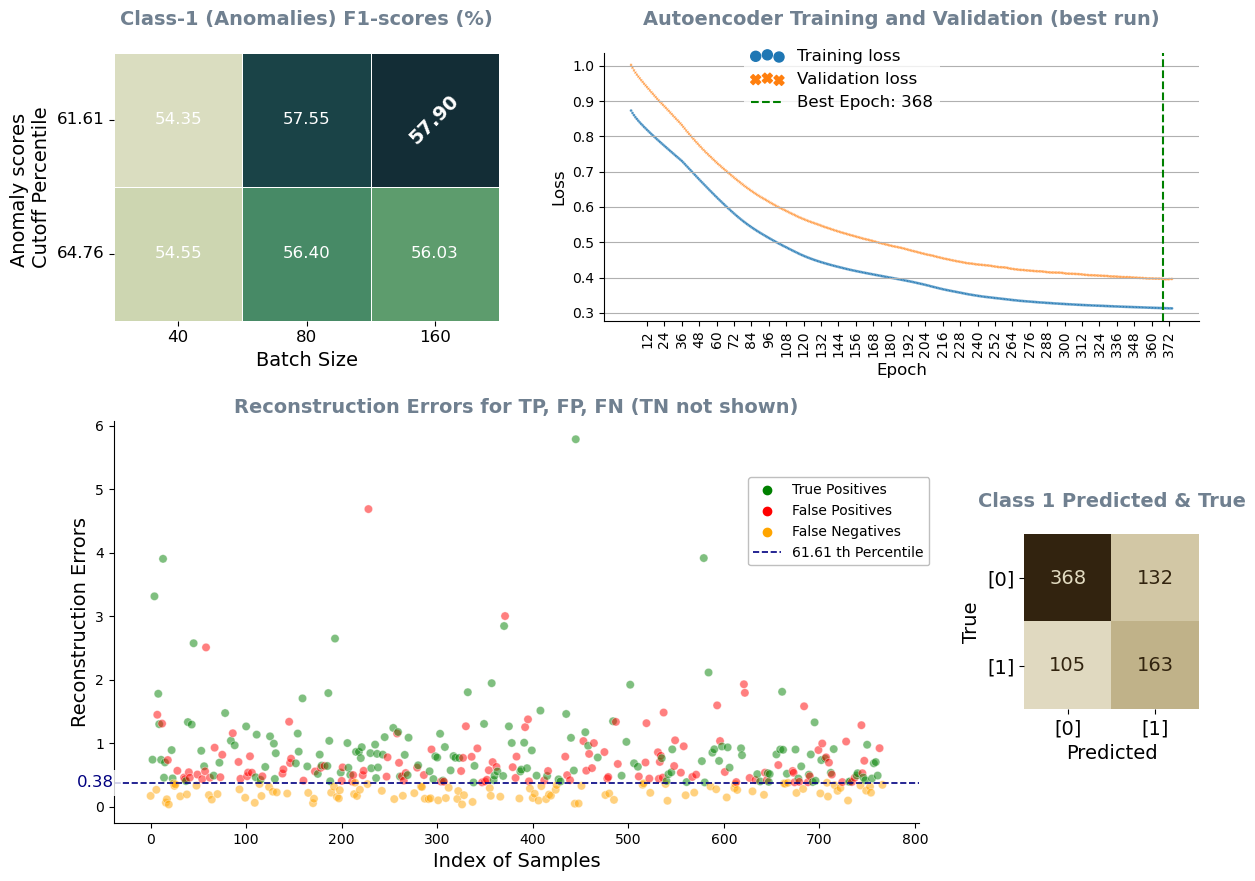

In [25]:
# Detect Anomalies Auto Encoder

# Get the grid of a specified size -- Single values, Small, Medium, Large, Very Large
# Run times (approx.): Very Large ~10 minutes, Large ~5 minutes, Medium ~2:30 minutes, Small ~ 2 minutes, Single values under 30 seconds 
anomaly_threshold_list, batch_size_list = get_ae_grid(gridsize = "Large")

if selected_option == 'Credit Card transactions':
    epochs, min_delta = 200, 0.001
elif selected_option == 'Diabetes':
    epochs, min_delta = 500, 0.0001



#anomaly_threshold_list = [64.76]
#anomaly_threshold_list = [99.83]


# Run with GRID of multiple values for each of error_threshold and batch size
(df_f1_scores_ae, 
 df_metrics_ae, best_f1_ae, best_params_ae, final_best_epoch_ae,
 df_errors_labels_ae, 
 anomalies_ae) = detect_anomalies_via_autoencoder(anomaly_threshold_list = anomaly_threshold_list,  
                                                  batch_size_list = batch_size_list,
                                                  epochs = epochs, early_stop_patience = 5, min_delta = min_delta,
                                                  dropout = 0, batch_normalization = False, 
                                                  seed = True)

result_file_name_ae = "autoencoder results " + filename 

plot_autoencoder_results(df_f1_scores_ae, 
                         df_metrics_ae, best_f1_ae, best_params_ae, final_best_epoch_ae,
                         df_errors_labels_ae, 
                         anomalies_ae,
                         result_file_name_ae)

<b style="font-family: Arial; font-size:1.5em;color:cadetblue;">Run XGBoost Regressor</b>

Progress (parameter grid):   0%|          | 0/9 [00:00<?, ?combination/s]

Training with (learning rate=0.1, max. depth=8) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Ealry Stopping NOT kicked in


Training with (learning rate=0.1, max. depth=9) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.1, max. depth=10) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.15, max. depth=8) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.15, max. depth=9) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.15, max. depth=10) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.2, max. depth=8) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.2, max. depth=9) progress:   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.2, max. depth=10) progress:   0%|          | 0/80 [00:00<?, ?round/s]

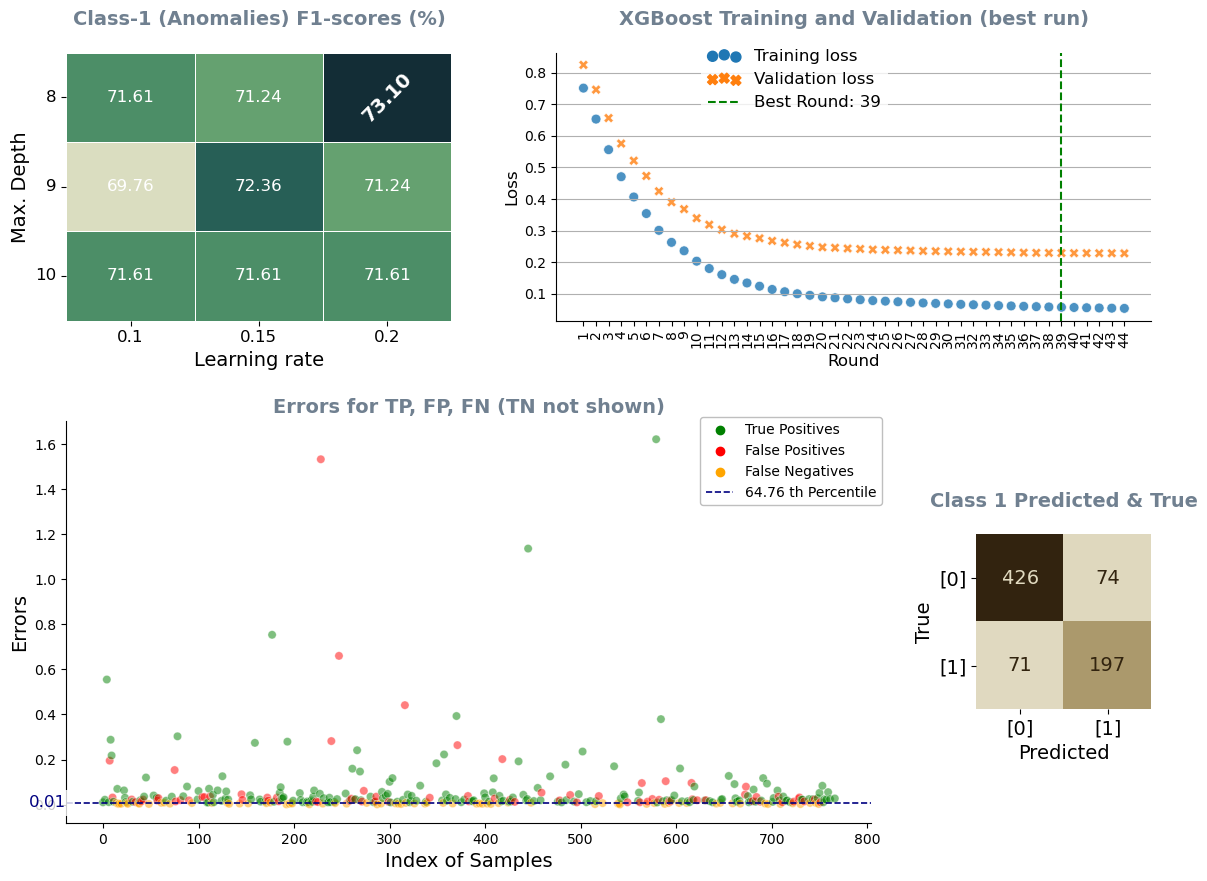

In [26]:
# Detect Anomalies XGBoost Regressor 

# Get the grid of a specified size -- Single values, Small, Medium, Large, Very Large
# Run times (approx.): Very Large ~3:15 minutes, Large ~2:45 minutes, Medium ~ 1:30 minutes, Small ~ 1 minute, Single values under 30 seconds 

(df_f1_scores_xgbreg, 
 df_metrics_xgbreg, best_f1_xgbreg, best_params_xgbreg, final_best_round_xgbreg,
 df_errors_labels_xgbreg, 
 anomalies_xgbreg) = detect_anomalies_via_xgb_regressor(gridsize = "Medium", n_est = 80,
                                                        early_stop_patience = 5, min_delta = 1e-3)

result_file_name_xgbreg = "XGBoost Regressor results " + filename 

plot_xgbreg_results(df_f1_scores_xgbreg, 
                    df_metrics_xgbreg, best_f1_xgbreg, best_params_xgbreg, final_best_round_xgbreg, 
                    df_errors_labels_xgbreg, 
                    anomalies_xgbreg, 
                    result_file_name_xgbreg)

<div style="background-color: lightcyan; padding: 5px; border-radius: 5px;">
<b style="font-family: Arial; font-size:1.8em;color:cornflowerblue;">Run Classification model </b></div>

<b style="font-family: Arial; font-size:1.5em;color:steelblue;">Run XGBoost Classifier</b>

Progress (parameter grid):   0%|          | 0/9 [00:00<?, ?combination/s]

Training with (learning rate=0.1, max. depth=6) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Ealry Stopping NOT kicked in


Training with (learning rate=0.1, max. depth=8) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Ealry Stopping NOT kicked in


Training with (learning rate=0.1, max. depth=10) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.15, max. depth=6) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.15, max. depth=8) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Ealry Stopping NOT kicked in


Training with (learning rate=0.15, max. depth=10) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.2, max. depth=6) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Ealry Stopping NOT kicked in


Training with (learning rate=0.2, max. depth=8) progress::   0%|          | 0/80 [00:00<?, ?round/s]

Training with (learning rate=0.2, max. depth=10) progress::   0%|          | 0/80 [00:00<?, ?round/s]

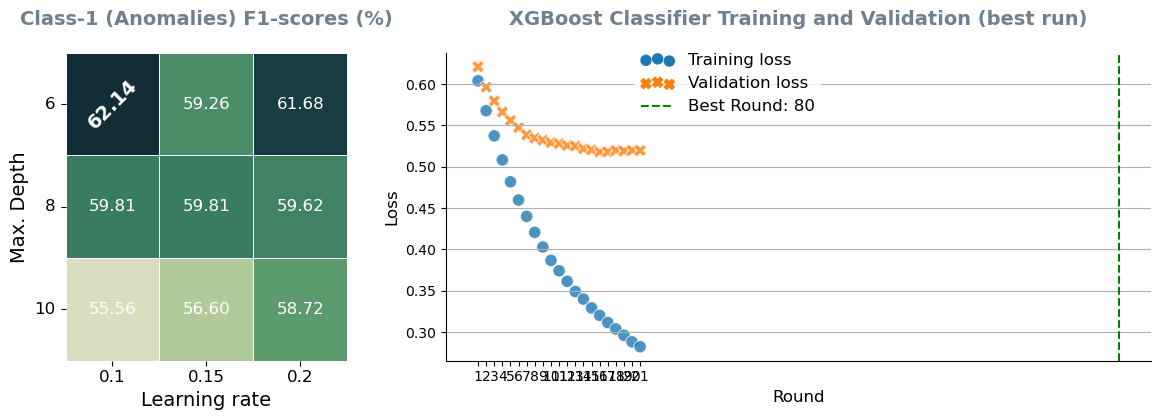

In [29]:
# Classify with XGBoost Classifier
(df_f1_scores_xgbclf,
 df_metrics_xgbclf,
 best_params_xgbclf, final_best_round_xgbclf,
 classified_xgbclf, df_y_test) = classify_via_xgb_classifier(test_size = 0.2, n_est = 80, gridsize = "Medium", 
                                                             patience = 5, min_delta = 1e-4)

result_file_name_xgbclf = "XGBoost Classifier results " + filename 

plot_xgbclf_results(df_f1_scores_xgbclf, 
                    df_metrics_xgbclf, final_best_round_xgbclf,
                    result_file_name_xgbclf)


<div style="background-color: cadetblue; padding: 5px; border-radius: 5px;">
<b style="font-family: Arial; font-size:1.8em;color:white;">Plot results summary</b></div>

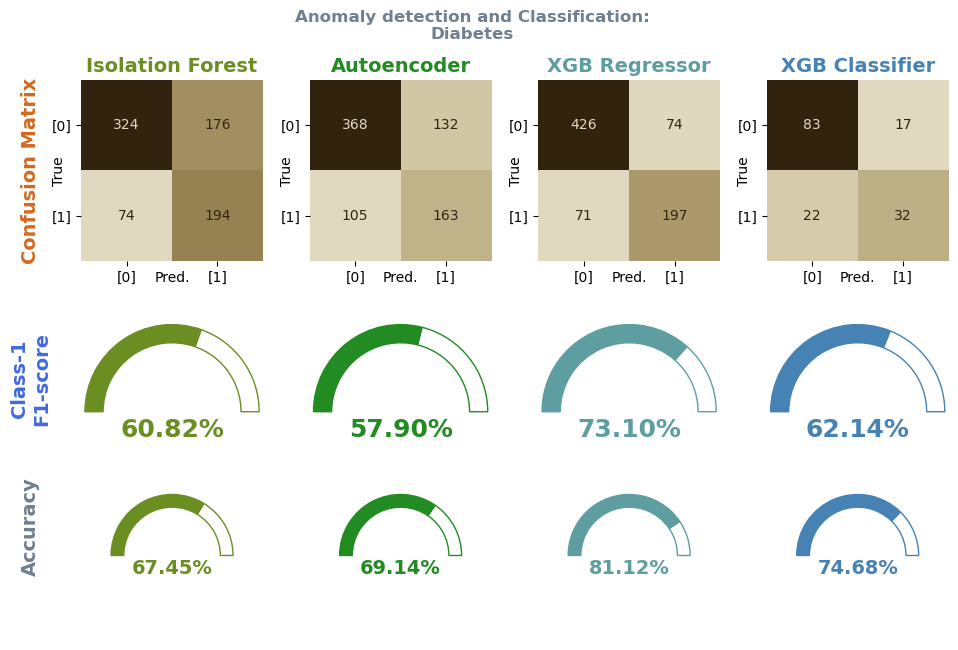

#### **Accuracy is often misleading, esp. for datasets with high class-imbalance**

##### Class-0 f1-scores were also expected to be very high

##### Our objective was to optimze Class-1 f1-scores without overfitting

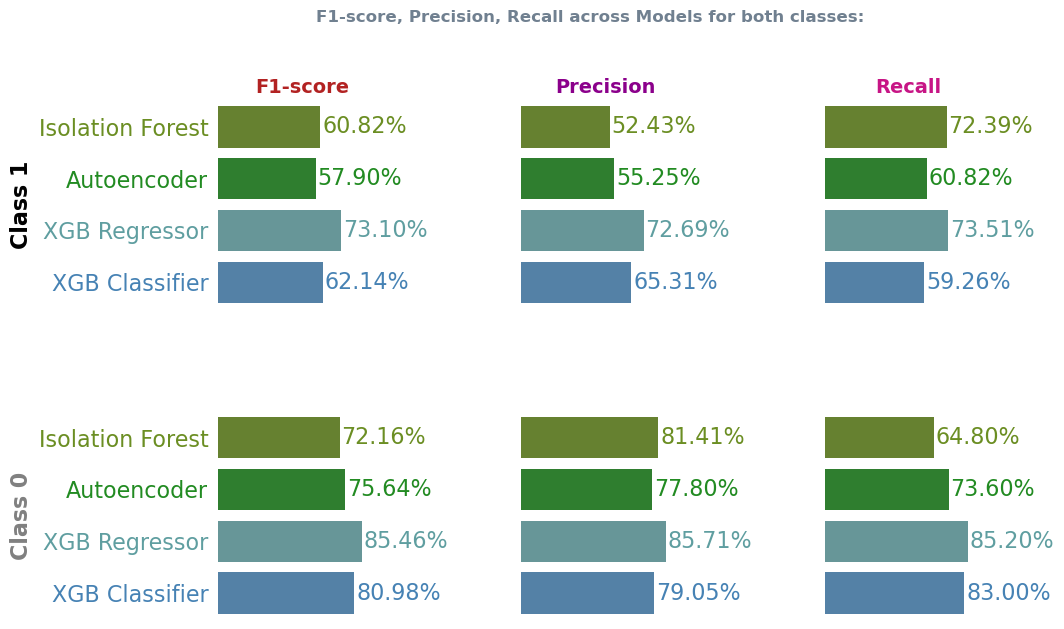

In [28]:
# Plot the Summary results
plot_cm_clas1f1_accuracy(anomalies_iso, anomalies_ae, anomalies_xgbreg, classified_xgbclf, 
                         df_y_test, 
                         model_colors, filename, plot_title)